#**Question 1:**

**Introduction**

Optimizers are algorithms or methods used to minimize an error function(loss function)or to maximize the efficiency of production. Optimizers are mathematical functions which are dependent on model’s learnable parameters i.e Weights & Biases. Optimizers help to know how to change weights and learning rate of neural network to reduce the losses.

**A: SGD+ Momentum**

Let's start with gradient descent. The basic formula for gradeint descent is:

$X_{k+1} = X_{k} - s\nabla f(X_{k})$

which indicates that we are descending in the negative direction of gradient.

If we can understand what the right direction is for the gradient steps to attain convergence faster, then we make our gradient steps navigate in that direction and reduce the oscillation in the irrevelant directions.


In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


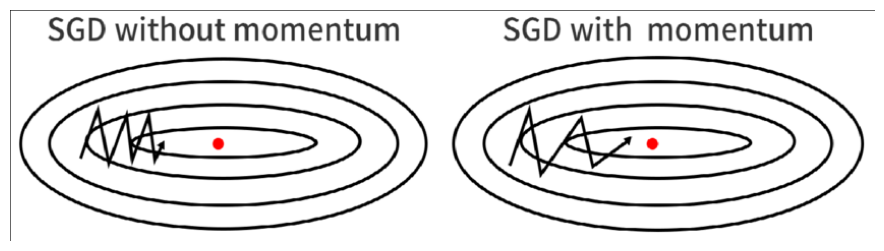

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI_presentation/1.png')
plt.figure(figsize = (300,3))
plt.axis('off')
plt.imshow(image1);

When we are at iteration k, we compute gradient descent, but now instead of just following the gradient right away, we first extrapolate the previous direction a little bit:

$X_{k+1} = X_{k} - sz_{k}$

$z_{k} = \nabla f(X_{k}) + \beta z_{k-1}$

we think of this extrapolation step as momentum carrying from previous iterations.

How much information we want to take from the previous gradient steps is decided by **$\beta$**.
[1]

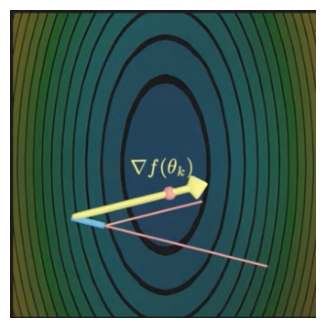

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI_presentation/2.png')
plt.figure(figsize = (300,4))
plt.axis('off')
plt.imshow(image1);

**B: Adagrad**

Adagrad stands for Adaptive Gradient Optimizer. In SGD and mini-batch SGD, the value of η used to be the same for each weight, or say for each parameter. Typically, η = 0.01.  But in Adagrad Optimizer the core idea is that each weight has a different learning rate (η).

What is the problem with SGD?

Small learning rates are less likely to overshoot, but they are also more likely to converge at a non_optimal local_minima.

Large learning rates converge faster, but are likely to overshoot.

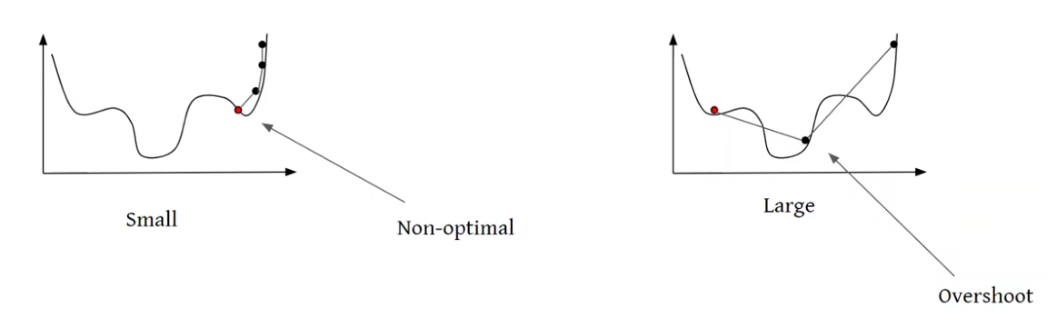

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI_presentation/3.png')
plt.figure(figsize = (300,4))
plt.axis('off')
plt.imshow(image1);

The solution to this problem is to assign an individual learning rate to every parameter in the model and this learning rate starts of as a large value and decreases overtime as we get closeer and closer to the optimal local minimum.

At every iteration the learning rate becomes the learning rate divided by the magnitude of a vector, where every element in set vector contains the gradient of all the past iterations.

We compute the magnitude by taking the square root of all of these elements squared and summing them up.


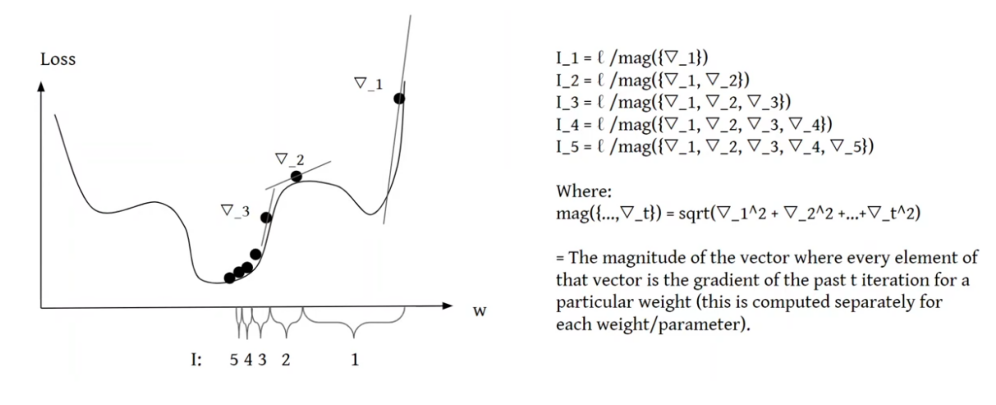

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI_presentation/4.png')
plt.figure(figsize = (300,5))
plt.axis('off')
plt.imshow(image1);

For each iteration:

The cache for the ith weight becomes the original value plus the ith element for the gradient squared.

The new ith weight becomes the original ith weight value minus the learning rate times the ith element of the gradient divided by the square root of cache plus some small positive number(to prevent division by zero).

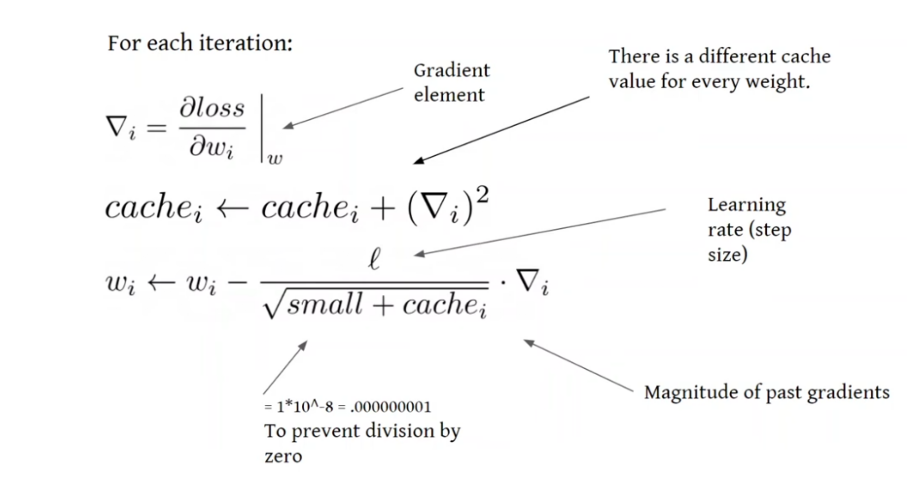

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI_presentation/5.png')
plt.figure(figsize = (300,6))
plt.axis('off')
plt.imshow(image1);

So by this attitude, The change in learning rate depends upon the difference in the parameters during training. The more the parameters get changed, the more minor the learning rate changes. [3]

**C: RMSprop**

RMSProp addresses the issue of a global learning rate by maintaining a moving average of the squares of gradients for each weight and dividing the learning rate by this average. This ensures that the learning rate is adapted for each weight in the model, allowing for more updates.

Instead of accumulating all past squared gradients, RMSprop restricts the accumulation to a fixed window of the most recent gradients. It uses a moving average of squared gradients to normalize the gradient itself. This modification allows the model to converge rapidly over convex surfaces while avoiding the decreasing learning rates problem associated with AdaGrad.

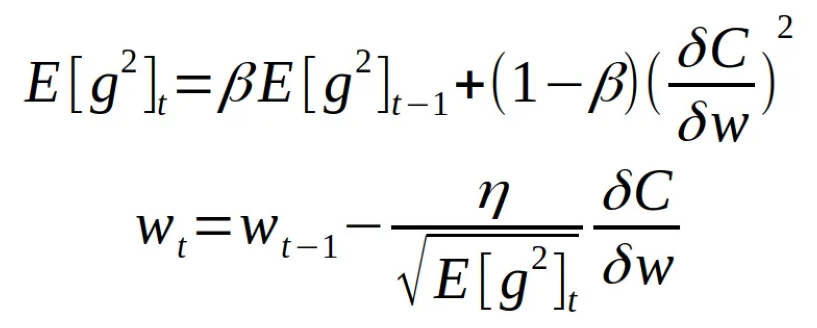

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI_presentation/6.png')
plt.figure(figsize = (300,4))
plt.axis('off')
plt.imshow(image1);

 where β is the decay rate, typically set to 0.9. [3]

#**Question 2:**


Compare the performance of SGD with momentum, Adagrad, RMSProp.

We will train a simple model using some basic layers, keeping the batch size and epochs the same but with different optimizers.

**1. Import Necessary Libraries**

Mnist is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


**2. Load the Dataset**

**why do we need to reshape data?**

Each image have size of 28*28 pixels; that is 28 pixels height and 28 pixels width and hence (28, 28, 1), 1 in last part is to specify color depth of the pixel.1 is for greyscale image(black and white image).

**What does to_categorial actually do here?**

to_categorial converts input format before feeding it into model. Machine learning models, particularly those based on neural networks, often require the target variables (labels) to be in a one-hot encoded format when dealing with categorical classification tasks.

For example, if we have the following labels: [0, 1, 2, 1, 0], after one-hot encoding, they would be represented as:

[
 [1, 0, 0],

 [0, 1, 0],

 [0, 0, 1],

 [0, 1, 0],

 [1, 0, 0]
]

**Why do we need to convert train data to float32 type?**

During the training process, gradients are computed to update the model parameters using optimization algorithms like gradient descent. Using float32 data types can help prevent numerical instability issues that may arise during gradient calculations, especially when dealing with very small or very large values.

**why do we need to divide data by 255?**

In the MNIST dataset, the pixel values of the grayscale images range from 0 to 255, where 0 represents black and 255 represents white. By dividing each pixel value by 255, you scale the values to a range between 0 and 1. This normalization ensures that all input features are on a similar scale, which can help the optimization algorithm converge faster and prevents certain features from dominating others during training

In [ ]:
x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test=  x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /= 255
x_test /=255



- Build the Model and test for SGD + momentum optimizer

**Advatages**

1. Faster convergence: Since it updates the model’s parameters after each data point, it can converge faster than other optimization algorithms like batch gradient descent.

- Lower memory requirements: SGD does not require storing all the data points in memory, which makes it more memory-efficient than other optimization algorithms for large datasets.


**Disadvantages**

- Need for careful tuning: Finding the optimal learning rate and other hyperparameters for SGD can be challenging and requires careful tuning.

- Sensitivity to initialization: The performance of SGD can depend heavily on the initial values of the model’s parameters, which can make it difficult to achieve consistent results across different runs.

- May require more iterations: Since SGD updates the model’s parameters after each data point, it may require more iterations to converge compared to other optimization algorithms like batch gradient descent.

Epoch 1/10
938/938 [==============================] - 44s 46ms/step - loss: 0.4039 - accuracy: 0.8744 - val_loss: 0.1474 - val_accuracy: 0.9547
Epoch 2/10
938/938 [==============================] - 43s 46ms/step - loss: 0.1824 - accuracy: 0.9449 - val_loss: 0.0861 - val_accuracy: 0.9731
Epoch 3/10
938/938 [==============================] - 42s 45ms/step - loss: 0.1319 - accuracy: 0.9600 - val_loss: 0.0682 - val_accuracy: 0.9778
Epoch 4/10
938/938 [==============================] - 43s 45ms/step - loss: 0.1063 - accuracy: 0.9672 - val_loss: 0.0568 - val_accuracy: 0.9811
Epoch 5/10
938/938 [==============================] - 43s 46ms/step - loss: 0.0910 - accuracy: 0.9722 - val_loss: 0.0496 - val_accuracy: 0.9838
Epoch 6/10
938/938 [==============================] - 44s 47ms/step - loss: 0.0795 - accuracy: 0.9753 - val_loss: 0.0464 - val_accuracy: 0.9849
Epoch 7/10
938/938 [==============================] - 43s 46ms/step - loss: 0.0713 - accuracy: 0.9781 - val_loss: 0.0459 - val_accuracy:

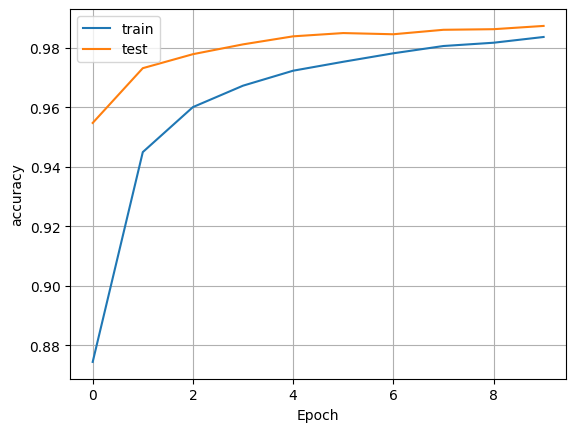

In [ ]:
from keras.optimizers import SGD

batch_size=64
num_classes=10
epochs=10

#build model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer= opt , metrics=['accuracy'])

# fit model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose='0')
_, test_acc = model.evaluate(x_test, y_test, verbose='0')
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plt history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

4. Build the Model and test for AdaGrad optimizer

**Advantages**

- Adapts the learning rate for each parameter based on the sum of the squares of its past gradients.

- Performs well for problems with low learning rates.

**Disadvantages**

- The learning rate can become too small over time.

- Requires more memory than SGD due to the need to store past gradients’ sums.

Epoch 1/10
938/938 [==============================] - 53s 54ms/step - loss: 1.5992 - accuracy: 0.5588 - val_loss: 0.7698 - val_accuracy: 0.8550
Epoch 2/10
938/938 [==============================] - 48s 51ms/step - loss: 0.7357 - accuracy: 0.7929 - val_loss: 0.4651 - val_accuracy: 0.8850
Epoch 3/10
938/938 [==============================] - 43s 46ms/step - loss: 0.5677 - accuracy: 0.8340 - val_loss: 0.3851 - val_accuracy: 0.8997
Epoch 4/10
938/938 [==============================] - 45s 48ms/step - loss: 0.4952 - accuracy: 0.8538 - val_loss: 0.3432 - val_accuracy: 0.9077
Epoch 5/10
938/938 [==============================] - 44s 47ms/step - loss: 0.4532 - accuracy: 0.8652 - val_loss: 0.3174 - val_accuracy: 0.9152
Epoch 6/10
938/938 [==============================] - 43s 46ms/step - loss: 0.4238 - accuracy: 0.8740 - val_loss: 0.2980 - val_accuracy: 0.9184
Epoch 7/10
938/938 [==============================] - 44s 47ms/step - loss: 0.4007 - accuracy: 0.8809 - val_loss: 0.2821 - val_accuracy:

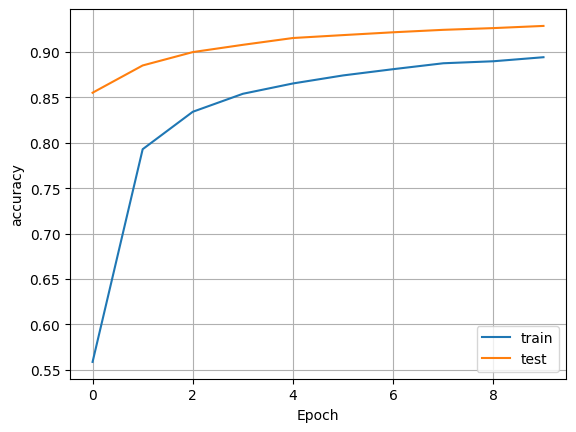

In [ ]:
batch_size=64
num_classes=10
epochs=10

#build model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer= 'Adagrad', metrics=['accuracy'])

# fit model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose='0')
_, test_acc = model.evaluate(x_test, y_test, verbose='0')
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plt history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

5. Build the Model and test for RMSProp optimizer

**Advantages**

- Adapts the learning rate for each parameter based on an exponentially decaying average of past squared gradients, making it suitable for deep neural networks with many layers.

- Performs well in various domains.

**Disadvantages**

- May converge slowly compared to other optimizers like Adam.

- Not suitable for problems with very sparse data.

Epoch 1/10
938/938 [==============================] - 47s 49ms/step - loss: 0.2407 - accuracy: 0.9260 - val_loss: 0.0654 - val_accuracy: 0.9800
Epoch 2/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0895 - accuracy: 0.9731 - val_loss: 0.0500 - val_accuracy: 0.9848
Epoch 3/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0653 - accuracy: 0.9804 - val_loss: 0.0436 - val_accuracy: 0.9860
Epoch 4/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0561 - accuracy: 0.9831 - val_loss: 0.0378 - val_accuracy: 0.9876
Epoch 5/10
938/938 [==============================] - 45s 48ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0365 - val_accuracy: 0.9876
Epoch 6/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0330 - val_accuracy: 0.9886
Epoch 7/10
938/938 [==============================] - 45s 48ms/step - loss: 0.0387 - accuracy: 0.9882 - val_loss: 0.0356 - val_accuracy:

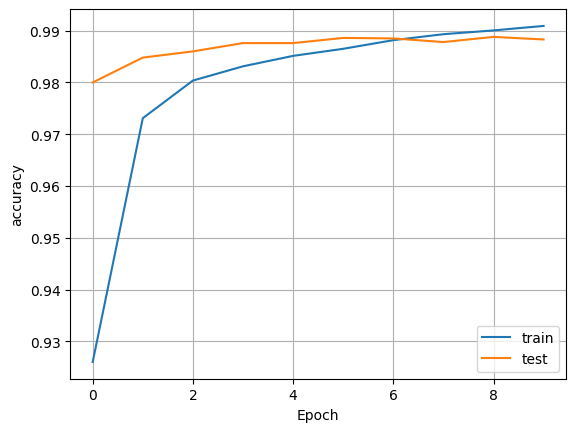

In [ ]:
batch_size=64
num_classes=10
epochs=10

#build model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer= 'RMSprop', metrics=['accuracy'])

# fit model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose='0')
_, test_acc = model.evaluate(x_test, y_test, verbose='0')
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plt history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

**Compare performances**

Adagrad works better than stochastic gradient descent generally due to frequent updates in the learning rate. It is best when used for dealing with sparse data. RMSProp shows similar results to that of the gradient descent algorithm with momentum, it just differs in the way by which the gradients are calculated. [4]

**why AdaGrad performs better on sparse data?**

AdaGrad adjusts learning rate based on the historical gradients. It performs larger updates(high learning rate) on rare features and smaller updates(low learning rate) on frequent features. In this way, it is effective on sparse data and can handle rare features.

#**Question 3:**

Synthetic Minority Oversampling Technique (SMOTE)

In the real world, oftentimes we end up trying to train a model on a dataset with very few examples of a given class, which results in poor performance. Due to the nature of the data (occurrences are so rare), it’s not always realistic to go out and acquire more.

One way of solving this issue is to under-sample the majority class. However, in doing so, we lose out on a lot of data that could be used to train our model thus improving its accuracy (e.g. higher bias). Another option is to over-sample the minority class. The problem with this approach is that it leads to overfitting because the model learns from the same examples. This is where SMOTE comes in.

The SMOTE method generates new synthetic data
patterns by performing linear interpolation between minority class samples and their K nearest neighbors.

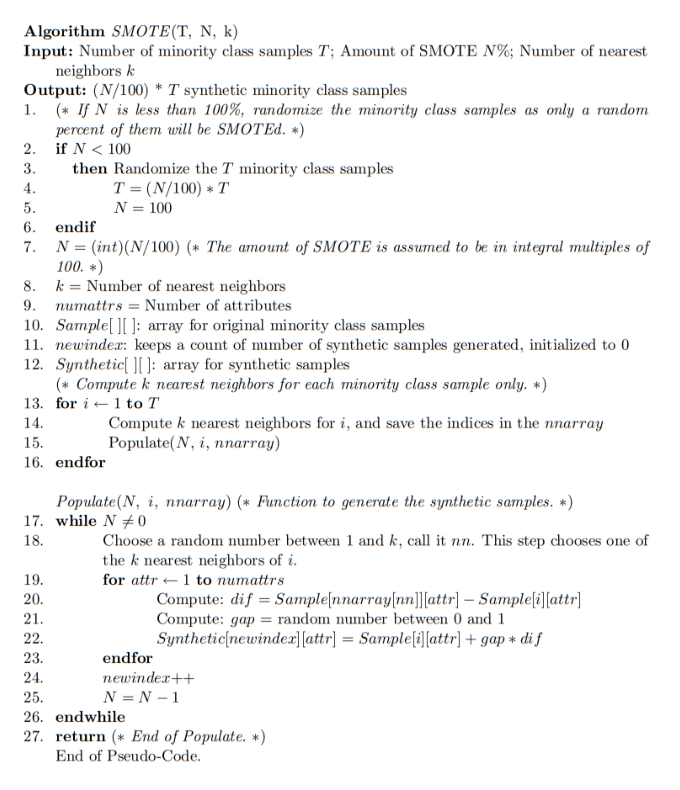

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI_presentation/7.png')
plt.figure(figsize = (300,10))
plt.axis('off')
plt.imshow(image1);

**Illustrate SMOTE performance with an example**

1. Import Neecessary libraries

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import matplotlib.pyplot as plot
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.losses import CategoricalCrossentropy
from imblearn.over_sampling import SMOTE
import math
from keras.callbacks import LearningRateScheduler

2. Import csv_file from Google Drive

In [ ]:
data_path="/content/drive/MyDrive/AI_presentation/Assignment_1-Dataset.csv"
dataset_df=pd.read_csv(data_path)

3. See some features of csv_file

In [ ]:
dataset_df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F86,F87,F88,F89,F90,F91,F92,Target,Unnamed: 93,Unnamed: 94
count,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,1.113040e+05,111304.000000,...,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,0.0,0.0
mean,1.384011,16.234637,1.141181,109.371424,1.678242,4.501159,0.116312,0.031535,3.779658e+06,38.706920,...,32.613482,63.606753,4096.888638,1.325262,13.327666,32.536432,1.247233,0.811660,NaN,NaN
std,0.486584,13.833192,1.729046,119.132927,0.467153,1.828697,1.364295,0.574920,2.086547e+08,47.314877,...,25.041610,2.130230,2210.531994,1.848414,8.912911,25.294460,0.971636,0.896797,NaN,NaN
min,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,...,0.000000,61.000000,1403.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
25%,1.000000,6.000000,0.000000,26.000000,1.000000,4.000000,0.000000,0.000000,0.000000e+00,10.000000,...,24.000000,61.000000,1416.000000,0.000000,0.000000,23.000000,1.000000,0.000000,NaN,NaN
50%,1.000000,7.000000,0.000000,50.000000,2.000000,4.000000,0.000000,0.000000,0.000000e+00,22.000000,...,36.000000,63.000000,3454.000000,0.000000,18.000000,36.000000,1.000000,0.000000,NaN,NaN
75%,2.000000,27.000000,2.000000,170.000000,2.000000,6.000000,0.000000,0.000000,0.000000e+00,48.000000,...,36.000000,66.000000,6444.000000,4.000000,18.000000,36.000000,1.000000,2.000000,NaN,NaN
max,4.000000,44.000000,6.000000,932.000000,2.000000,8.000000,88.000000,50.000000,3.889600e+10,332.000000,...,300.000000,70.000000,9960.000000,7.000000,36.000000,300.000000,87.000000,2.000000,NaN,NaN


In [ ]:
dataset_df.count()

F1             111304
F2             111304
F3             111304
F4             111304
F5             111304
                ...  
F91            111304
F92            111304
Target         111304
Unnamed: 93         0
Unnamed: 94         0
Length: 95, dtype: int64

4. two last columns in csv_file have NaN data. we should drop them

In [ ]:
dataset_df.drop(dataset_df.columns[dataset_df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

5. Set value we want to predict

In [ ]:
X=dataset_df.drop('Target',axis=1)
y=dataset_df['Target']

6. Check if changes applied correctly

In [ ]:
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F83,F84,F85,F86,F87,F88,F89,F90,F91,F92
0,1,7,2,29,2,6,0,0,0,81,...,66,4,21.0,0,66,6401,4,21.0,0,2
1,1,28,0,42,2,4,0,0,0,14,...,63,4,15.0,36,63,3413,4,15.0,36,1
2,1,7,0,42,2,4,0,0,0,10,...,63,4,15.0,36,63,3413,4,15.0,36,1
3,1,28,0,42,2,4,0,0,0,11,...,63,4,15.0,36,63,3413,4,15.0,36,1
4,2,7,0,42,2,6,0,0,0,13,...,63,4,15.0,36,63,3413,4,15.0,36,1


7. Split data to train and test data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.75, random_state=42)

8. Standardize train and test data

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

pca = decomposition.PCA(n_components=0.95)
pca.fit(X_train_scaled)
pca.fit(X_val_scaled)

y_train = to_categorical(y_train, 3)
y_val = to_categorical(y_val, 3)

9. create a model and test it.

Epoch 1/100
653/653 [==============================] - 4s 5ms/step - loss: 0.7836 - accuracy: 0.6043 - val_loss: 0.7147 - val_accuracy: 0.6386
Epoch 2/100
653/653 [==============================] - 3s 5ms/step - loss: 0.7215 - accuracy: 0.6334 - val_loss: 0.6936 - val_accuracy: 0.6433
Epoch 3/100
653/653 [==============================] - 4s 5ms/step - loss: 0.7035 - accuracy: 0.6416 - val_loss: 0.6860 - val_accuracy: 0.6492
Epoch 4/100
653/653 [==============================] - 4s 6ms/step - loss: 0.6944 - accuracy: 0.6469 - val_loss: 1568.4211 - val_accuracy: 0.6513
Epoch 5/100
653/653 [==============================] - 3s 5ms/step - loss: 0.6861 - accuracy: 0.6494 - val_loss: 1380.7314 - val_accuracy: 0.6601
Epoch 6/100
653/653 [==============================] - 3s 5ms/step - loss: 0.6809 - accuracy: 0.6556 - val_loss: 1601.5874 - val_accuracy: 0.6553
Epoch 7/100
653/653 [==============================] - 3s 5ms/step - loss: 0.6746 - accuracy: 0.6592 - val_loss: 0.6630 - val_accurac

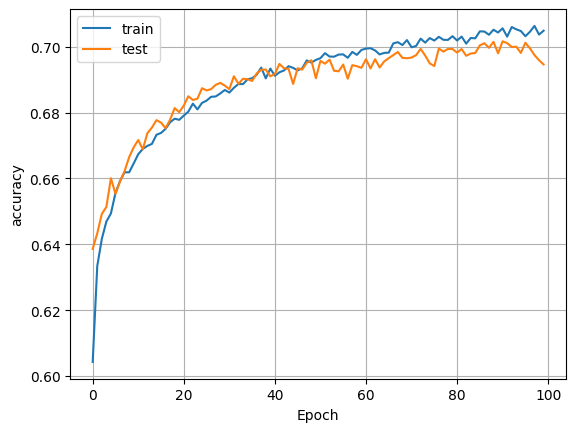

In [ ]:
#build model
model = Sequential()
model.add(Dense(128, input_shape = (92,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=CategoricalCrossentropy(), metrics=['accuracy'])

#fit model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_data=(X_val_scaled, y_val))

_, train_acc = model.evaluate(X_train_scaled, y_train, verbose='0')
_, test_acc = model.evaluate(X_val_scaled, y_val, verbose='0')
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot history
plot.plot(history.history['accuracy'], label='train')
plot.plot(history.history['val_accuracy'], label='test')
plot.xlabel('Epoch')
plot.ylabel('accuracy')
plot.legend()
plot.grid(True)

10. Now, apply SMOTE on dataset and Standardize it again.

In [ ]:
oversample = SMOTE()
X2, y2 = oversample.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X2, y2, train_size=0.75, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

pca = decomposition.PCA(n_components=0.95)
pca.fit(X_train_scaled)
pca.fit(X_val_scaled)

y_train = to_categorical(y_train, 3)
y_val = to_categorical(y_val, 3)

11. Now we use previous model and test it again, this time we changed dataset use SMOTE.

Epoch 1/100
1006/1006 [==============================] - 15s 13ms/step - loss: 0.7375 - accuracy: 0.6434 - val_loss: 1890.4708 - val_accuracy: 0.6835
Epoch 2/100
1006/1006 [==============================] - 5s 5ms/step - loss: 0.6584 - accuracy: 0.6819 - val_loss: 0.6122 - val_accuracy: 0.7019
Epoch 3/100
1006/1006 [==============================] - 8s 8ms/step - loss: 0.6310 - accuracy: 0.6939 - val_loss: 0.5954 - val_accuracy: 0.7084
Epoch 4/100
1006/1006 [==============================] - 6s 6ms/step - loss: 0.6163 - accuracy: 0.6996 - val_loss: 0.5857 - val_accuracy: 0.7147
Epoch 5/100
1006/1006 [==============================] - 7s 7ms/step - loss: 0.6045 - accuracy: 0.7052 - val_loss: 0.5762 - val_accuracy: 0.7216
Epoch 6/100
1006/1006 [==============================] - 5s 5ms/step - loss: 0.5979 - accuracy: 0.7090 - val_loss: 0.5694 - val_accuracy: 0.7219
Epoch 7/100
1006/1006 [==============================] - 7s 7ms/step - loss: 0.5892 - accuracy: 0.7158 - val_loss: 0.5624 - v

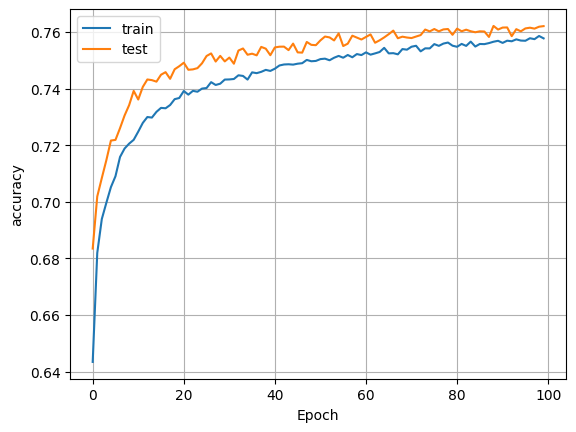

In [ ]:
#build model
model = Sequential()
model.add(Dense(128, input_shape = (92,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=CategoricalCrossentropy(), metrics=['accuracy'])

#fit model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_data=(X_val_scaled, y_val))

_, train_acc = model.evaluate(X_train_scaled, y_train, verbose='0')
_, test_acc = model.evaluate(X_val_scaled, y_val, verbose='0')
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot history
plot.plot(history.history['accuracy'], label='train')
plot.plot(history.history['val_accuracy'], label='test')
plot.xlabel('Epoch')
plot.ylabel('accuracy')
plot.legend()
plot.grid(True)

So as we see,by applying SMOTE on an inbalanced dataset, we can see increase in accuracy.

#**Question 4**

Build a classification model employing a Deep Neural Network using provided
dataset.

We use modified version of model generated in Question 3 and Adagrad optimizer and test it use provided dataset.

Epoch 1/100
4023/4023 [==============================] - 16s 4ms/step - loss: 0.8852 - accuracy: 0.5689 - val_loss: 0.8230 - val_accuracy: 0.6166
Epoch 2/100
4023/4023 [==============================] - 9s 2ms/step - loss: 0.7953 - accuracy: 0.6277 - val_loss: 0.7824 - val_accuracy: 0.6351
Epoch 3/100
4023/4023 [==============================] - 10s 3ms/step - loss: 0.7669 - accuracy: 0.6406 - val_loss: 0.7621 - val_accuracy: 0.6460
Epoch 4/100
4023/4023 [==============================] - 10s 3ms/step - loss: 0.7509 - accuracy: 0.6482 - val_loss: 0.7491 - val_accuracy: 0.6511
Epoch 5/100
4023/4023 [==============================] - 9s 2ms/step - loss: 0.7400 - accuracy: 0.6535 - val_loss: 0.7398 - val_accuracy: 0.6558
Epoch 6/100
4023/4023 [==============================] - 11s 3ms/step - loss: 0.7318 - accuracy: 0.6579 - val_loss: 0.7328 - val_accuracy: 0.6590
Epoch 7/100
4023/4023 [==============================] - 11s 3ms/step - loss: 0.7253 - accuracy: 0.6610 - val_loss: 0.7273 - v

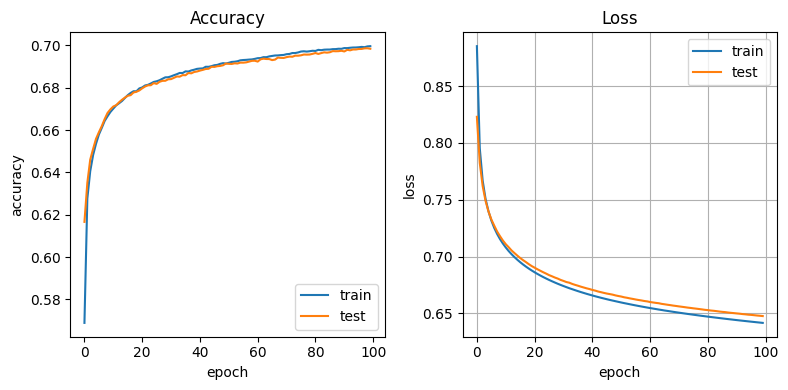

In [ ]:
#build model
model = Sequential()
model.add(Dense(128, input_shape = (92,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile model
model.compile(optimizer='Adagrad', loss=CategoricalCrossentropy(), metrics=['accuracy'])

#fit model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val))

_, train_acc = model.evaluate(X_train_scaled, y_train, verbose='0')
_, test_acc = model.evaluate(X_val_scaled, y_val, verbose='0')
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot history
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(121)
ax.plot(history.history['accuracy'], label='train')
ax.plot(history.history['val_accuracy'], label='test')
ax.set_title('Accuracy')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
plt.legend(loc = 4)

ax2 = fig.add_subplot(122)
ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='test')
ax2.set_title('Loss')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
plt.legend(loc = 8)

fig.tight_layout()
plot.legend()
plot.grid(True)
plt.show()

We use modified version of model generated in Question 3 and RMSprop optimizer and test it use provided dataset.

Epoch 1/100
1006/1006 [==============================] - 4s 4ms/step - loss: 0.8204 - accuracy: 0.6047 - val_loss: 0.7476 - val_accuracy: 0.6486
Epoch 2/100
1006/1006 [==============================] - 3s 3ms/step - loss: 0.7273 - accuracy: 0.6556 - val_loss: 0.7137 - val_accuracy: 0.6648
Epoch 3/100
1006/1006 [==============================] - 3s 3ms/step - loss: 0.7006 - accuracy: 0.6715 - val_loss: 0.6919 - val_accuracy: 0.6759
Epoch 4/100
1006/1006 [==============================] - 3s 3ms/step - loss: 0.6832 - accuracy: 0.6786 - val_loss: 0.6778 - val_accuracy: 0.6821
Epoch 5/100
1006/1006 [==============================] - 5s 5ms/step - loss: 0.6704 - accuracy: 0.6852 - val_loss: 0.6671 - val_accuracy: 0.6883
Epoch 6/100
1006/1006 [==============================] - 3s 3ms/step - loss: 0.6601 - accuracy: 0.6904 - val_loss: 0.6580 - val_accuracy: 0.6915
Epoch 7/100
1006/1006 [==============================] - 3s 3ms/step - loss: 0.6518 - accuracy: 0.6947 - val_loss: 0.6509 - val_ac

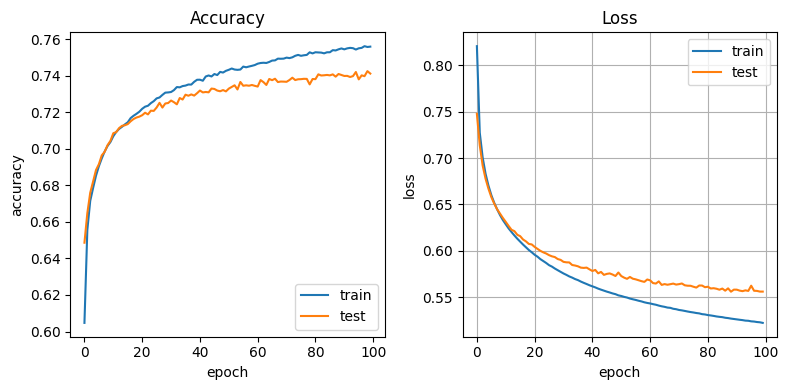

In [ ]:
#build model
model = Sequential()
model.add(Dense(128, input_shape = (92,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = RMSprop(learning_rate = 0.0001, rho = 0.9, epsilon=1e-6)
model.compile(optimizer=opt, loss=CategoricalCrossentropy(), metrics=['accuracy'])

#fit model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_data=(X_val_scaled, y_val))

_, train_acc = model.evaluate(X_train_scaled, y_train, verbose='0')
_, test_acc = model.evaluate(X_val_scaled, y_val, verbose='0')
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot history
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(121)
ax.plot(history.history['accuracy'], label='train')
ax.plot(history.history['val_accuracy'], label='test')
ax.set_title('Accuracy')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
plt.legend(loc = 4)

ax2 = fig.add_subplot(122)
ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='test')
ax2.set_title('Loss')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
plt.legend(loc = 8)

fig.tight_layout()
plot.legend()
plot.grid(True)
plt.show()

# **References**

[1]: "Accelerate Gradient Descent with Momentum (in 3 minutes)" YouTube, uploaded by Visually Explained,  30 Oct 2021, https://www.youtube.com/watch?v=iudXf5n_3ro.

Du, Juan. (2019). The Frontier of SGD and Its Variants in Machine Learning. Journal of Physics: Conference Series. 1229. 012046. 10.1088/1742-6596/1229/1/012046.

"Accelerating Gradient Descent (Use Momentum)" YouTube, uploaded by MIT OpenCourseWare, 16 May 2019,https://www.youtube.com/watch?v=wrEcHhoJxjM.

[2]: nikki2398. (26 Nov, 2020). Intuition behind Adagrad Optimizer. geeksforgeeks. https://www.geeksforgeeks.org/intuition-behind-adagrad-optimizer/

"AdaGrad Optimizer For Gradient Descent" YouTube, uploaded by John Lins, 24 Apr 2022, https://www.youtube.com/watch?v=RXgF14WblVo.

[3]: Understanding RMSProp: An Adaptive Learning Rate Method — faster neural network learning. deepai. https://deepai.org/machine-learning-glossary-and-terms/rmsprop#:~:text=RMSProp%20addresses%20the%20issue%20of,allowing%20for%20more%20nuanced%20updates.

Alok Yadav. (12 Jul, 2023). Taming the Optimizers: AdaGrad, Adam, and RMSprop in Deep Learning. medium. https://medium.com/@alok.yadav/taming-the-optimizers-adagrad-adam-and-rmsprop-in-deep-learning-7b0582b0ceba#:~:text=RMSprop%3A%20Overcoming%20the%20Shortcomings%20of%20AdaGrad&text=It%20uses%20a%20moving%20average,rates%20problem%20associated%20with%20AdaGrad.

[4]: Ayush Gupta. (23 Jan, 2024). A Comprehensive Guide on Optimizers in Deep Learning. analyticsvidhya. https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#:~:text=Adagrad%20works%20better%20than%20stochastic,which%20the%20gradients%20are%20calculated.

[5]: Cory Maklin. (15 May, 2022). Synthetic Minority Over-sampling TEchnique (SMOTE). medium. https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

Nitesh V. Chawla, Kevin W. Bowyer, Lawrence O. Hall, W. Philip Kegelmeyer. (2002). SMOTE: Synthetic Minority Over-sampling Techniqu. Journal of Artificial Intelligence Research 16 (2002) 321–357.

 Jason Brownlee. (17 March , 2021). SMOTE for Imbalanced Classification with Python. machinelearningmastery. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
